In [2]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

### 1. Load data

In [3]:
auc_dataframe = pd.read_table('s4-merged_auc.dir/library_auc.txt')
auc_dataframe.head()

term_name       auc           normalization  \
0  AKT1_human_kinase_ARCHS4_coexpression  0.663120         autorif_overlap   
1  AKT1_human_kinase_ARCHS4_coexpression  0.688266  autorif_overlap_zscore   
2  AKT1_human_kinase_ARCHS4_coexpression  0.991607             correlation   
3  AKT1_human_kinase_ARCHS4_coexpression  0.986900         correlation_abs   
4  AKT1_human_kinase_ARCHS4_coexpression  0.964667                fraction   

                library  nr_genes  
0  ARCHS4_Kinases_Coexp       299  
1  ARCHS4_Kinases_Coexp       299  
2  ARCHS4_Kinases_Coexp       299  
3  ARCHS4_Kinases_Coexp       299  
4  ARCHS4_Kinases_Coexp       299

In [4]:
def termsize(x):
    if x <= 10:
        return 'small'
    elif 10 < x <= 100:
        return 'medium'
    elif x > 100:
        return 'large'

### 2. Merge

In [14]:
plot_dataframe = auc_dataframe.dropna().query('nr_genes < 10000 and normalization in ["autorif_overlap_zscore", "generif_overlap_zscore", "zscore", "correlation", "random"]')
plot_dataframe['term_size'] = [termsize(x) for x in plot_dataframe['nr_genes']]
# plot_dataframe['random'] = ['better' if x > 0.5 else 'worse' for x in plot_dataframe['auc']]
print(plot_dataframe.shape)
plot_dataframe.head()

(110143, 7)


term_name       auc           normalization  \
1  AKT1_human_kinase_ARCHS4_coexpression  0.688266  autorif_overlap_zscore   
2  AKT1_human_kinase_ARCHS4_coexpression  0.991607             correlation   
6  AKT1_human_kinase_ARCHS4_coexpression  0.592859  generif_overlap_zscore   
7  AKT1_human_kinase_ARCHS4_coexpression  0.547477                  random   
9  AKT1_human_kinase_ARCHS4_coexpression  0.975910                  zscore   

                library  nr_genes term_size  random  
1  ARCHS4_Kinases_Coexp       299     large  better  
2  ARCHS4_Kinases_Coexp       299     large  better  
6  ARCHS4_Kinases_Coexp       299     large  better  
7  ARCHS4_Kinases_Coexp       299     large  better  
9  ARCHS4_Kinases_Coexp       299     large  better

### 3. Violin Plots

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



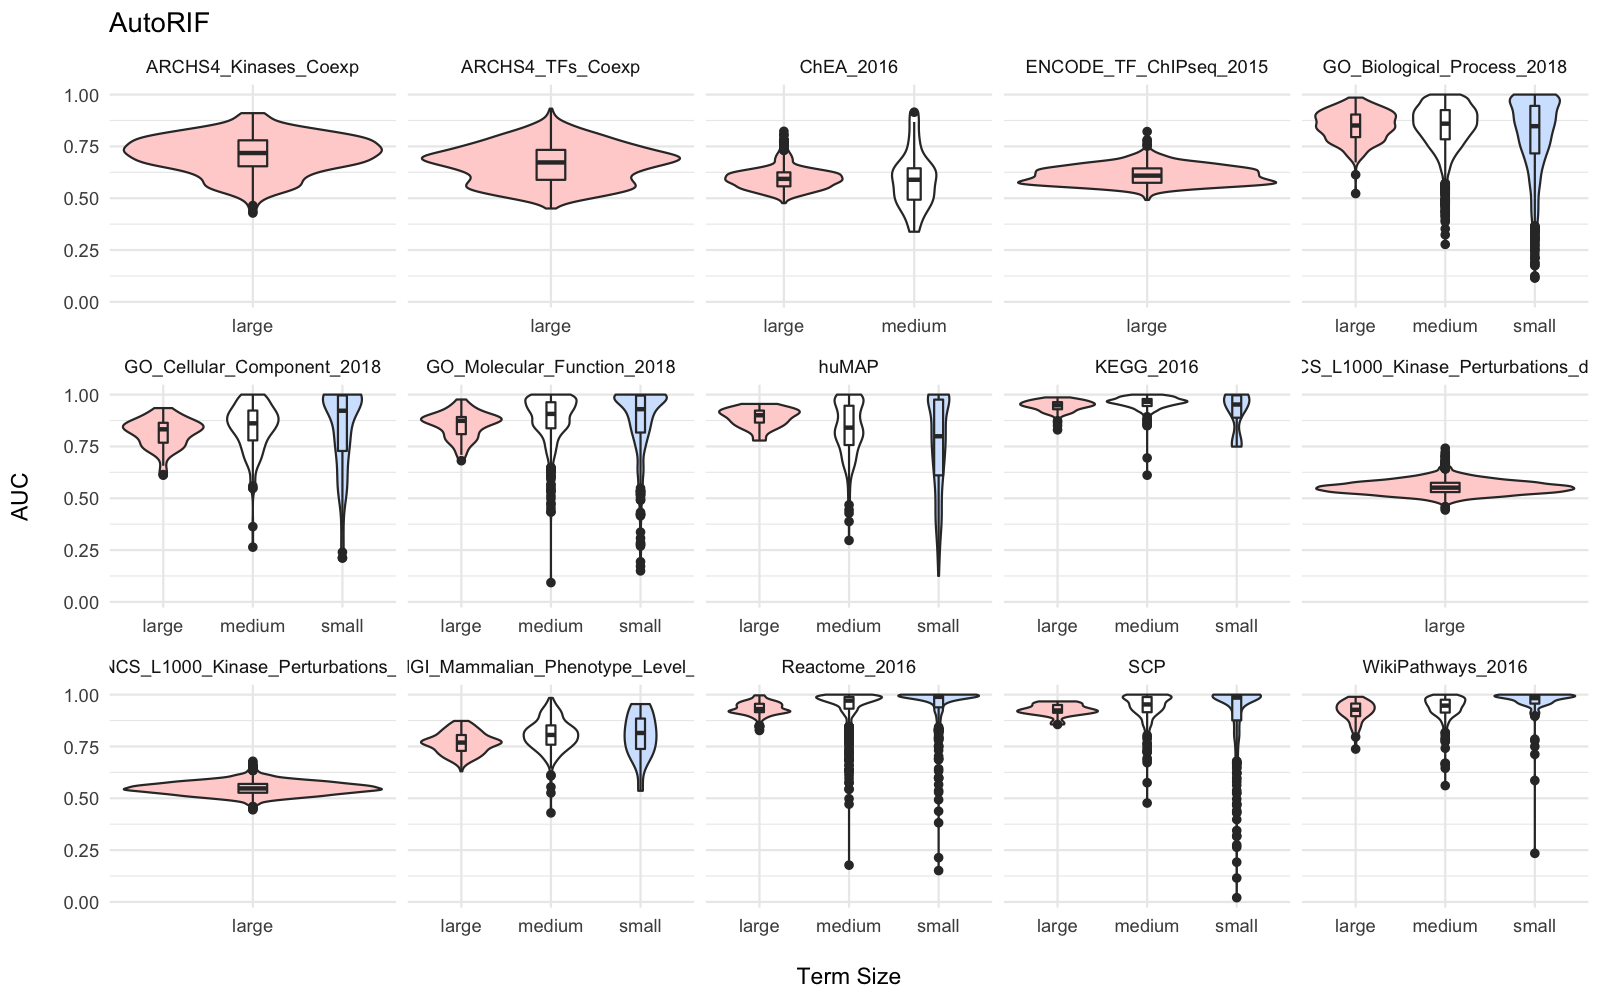

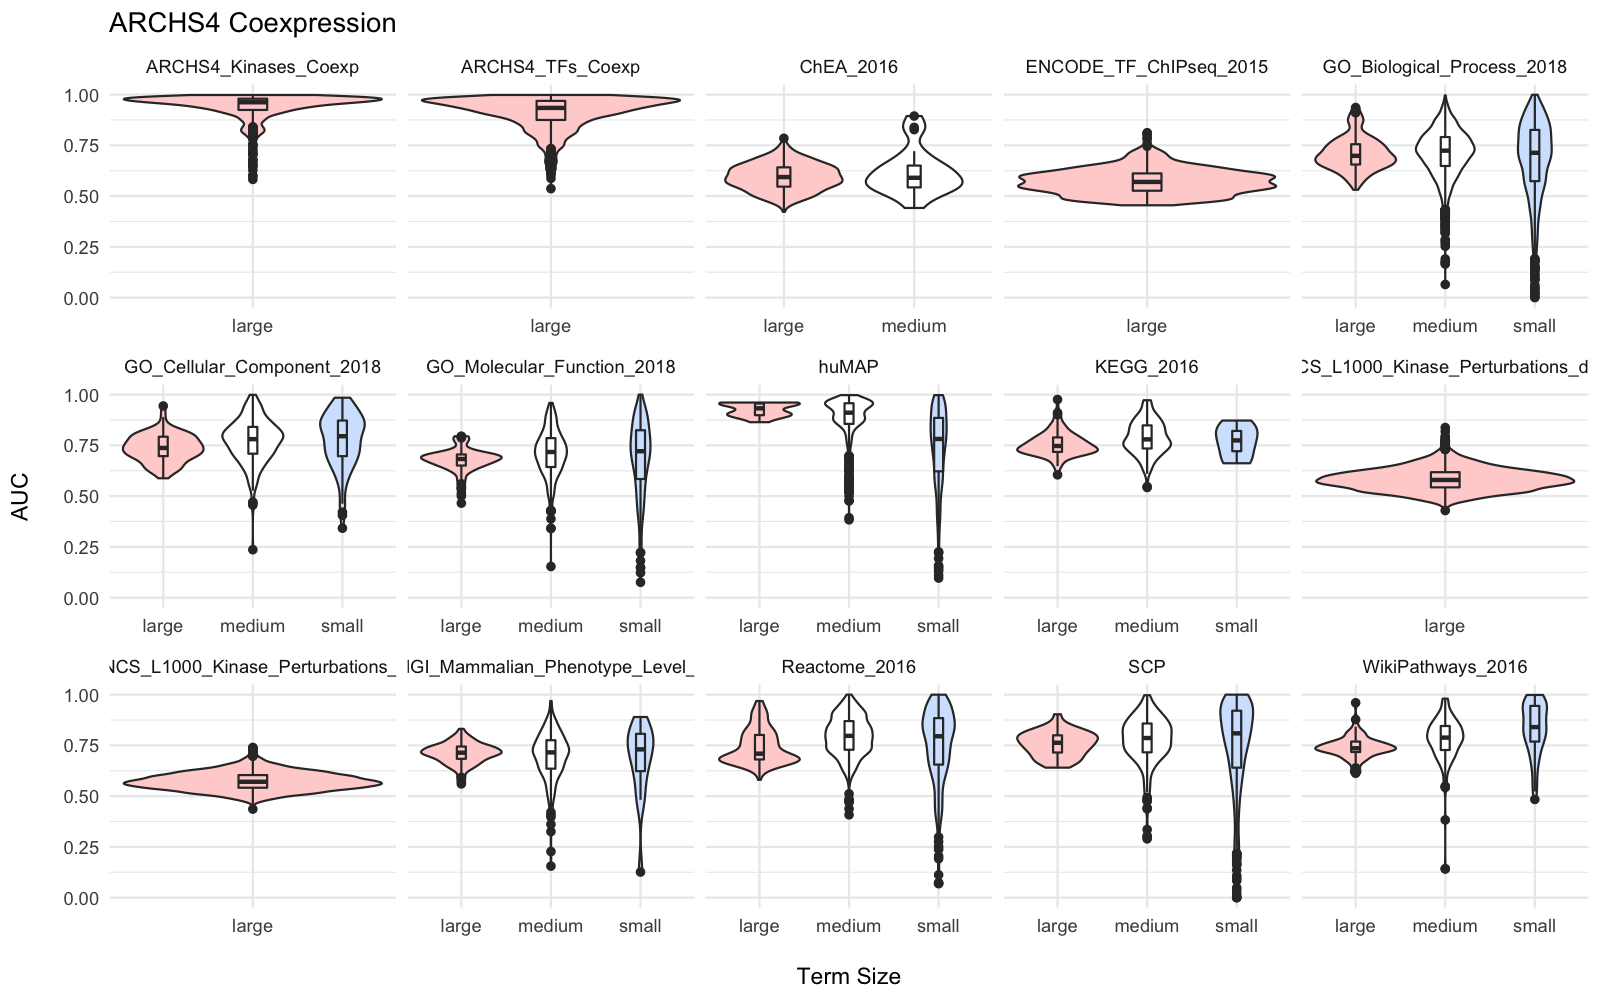

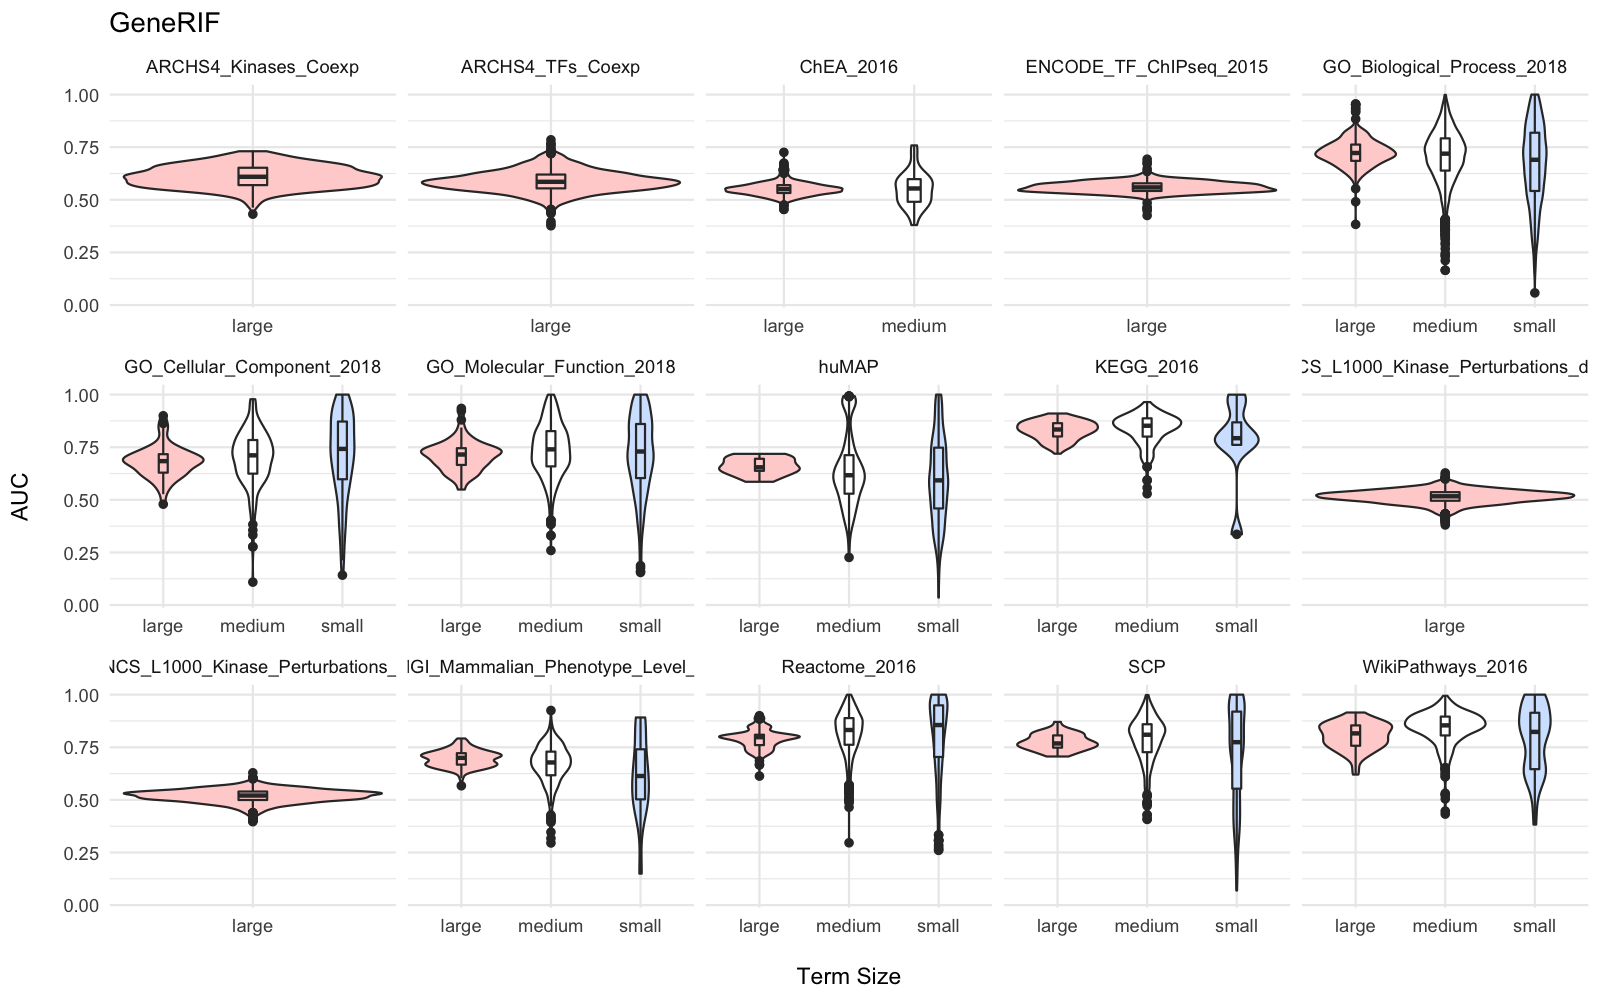

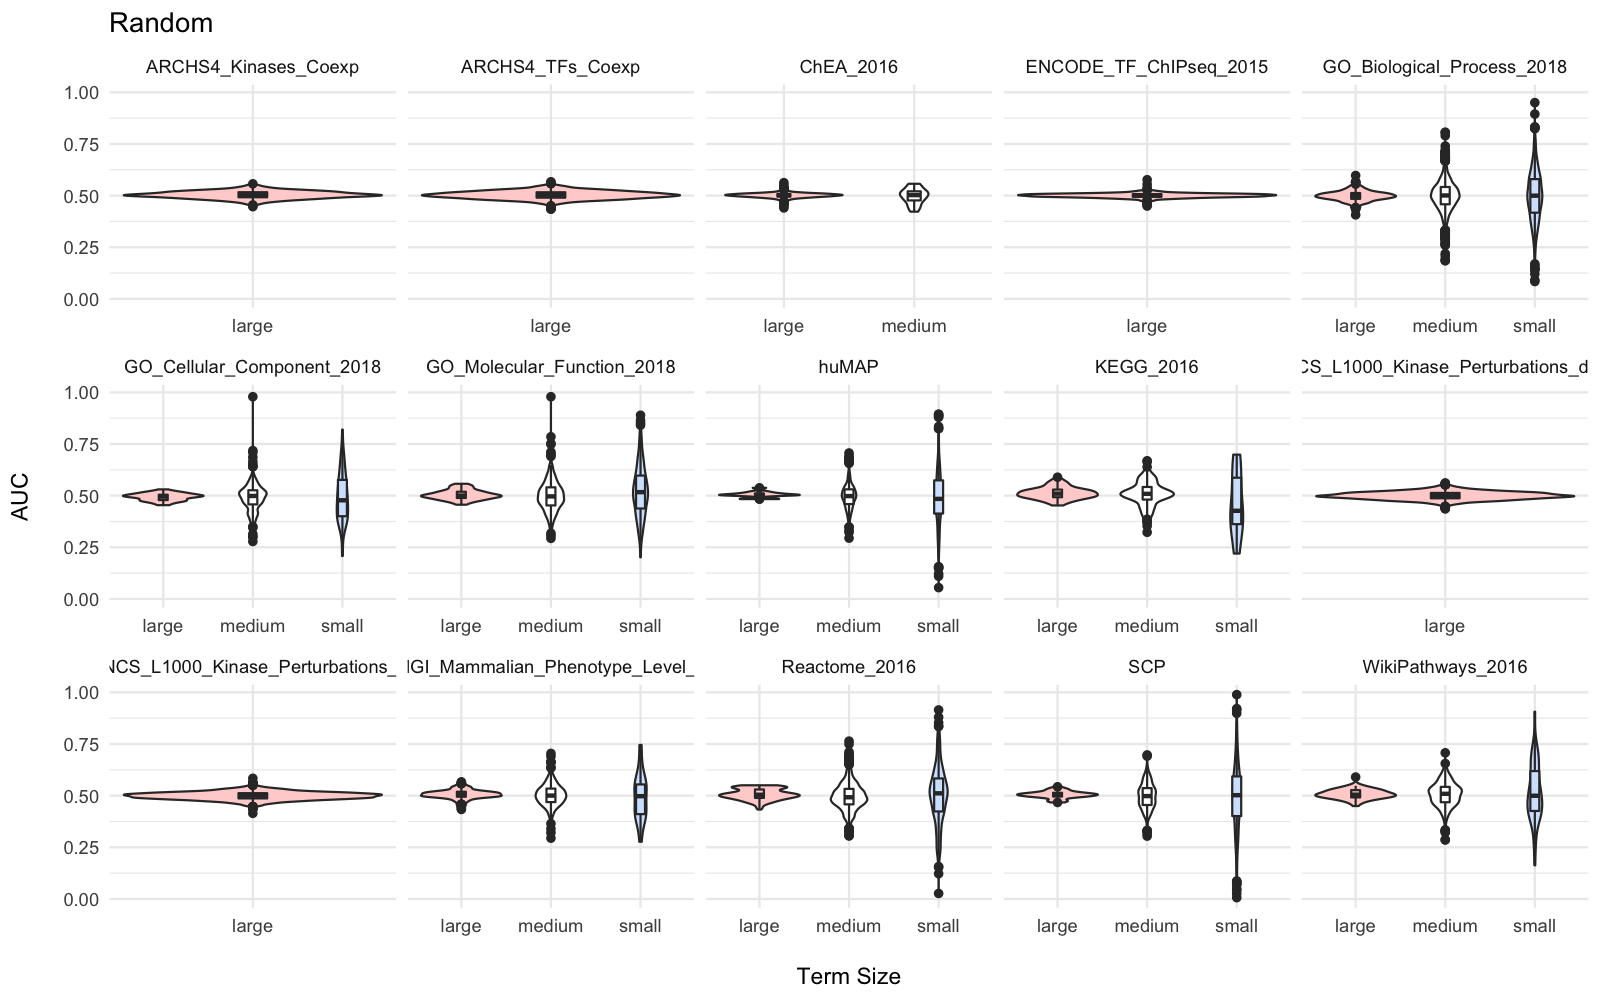

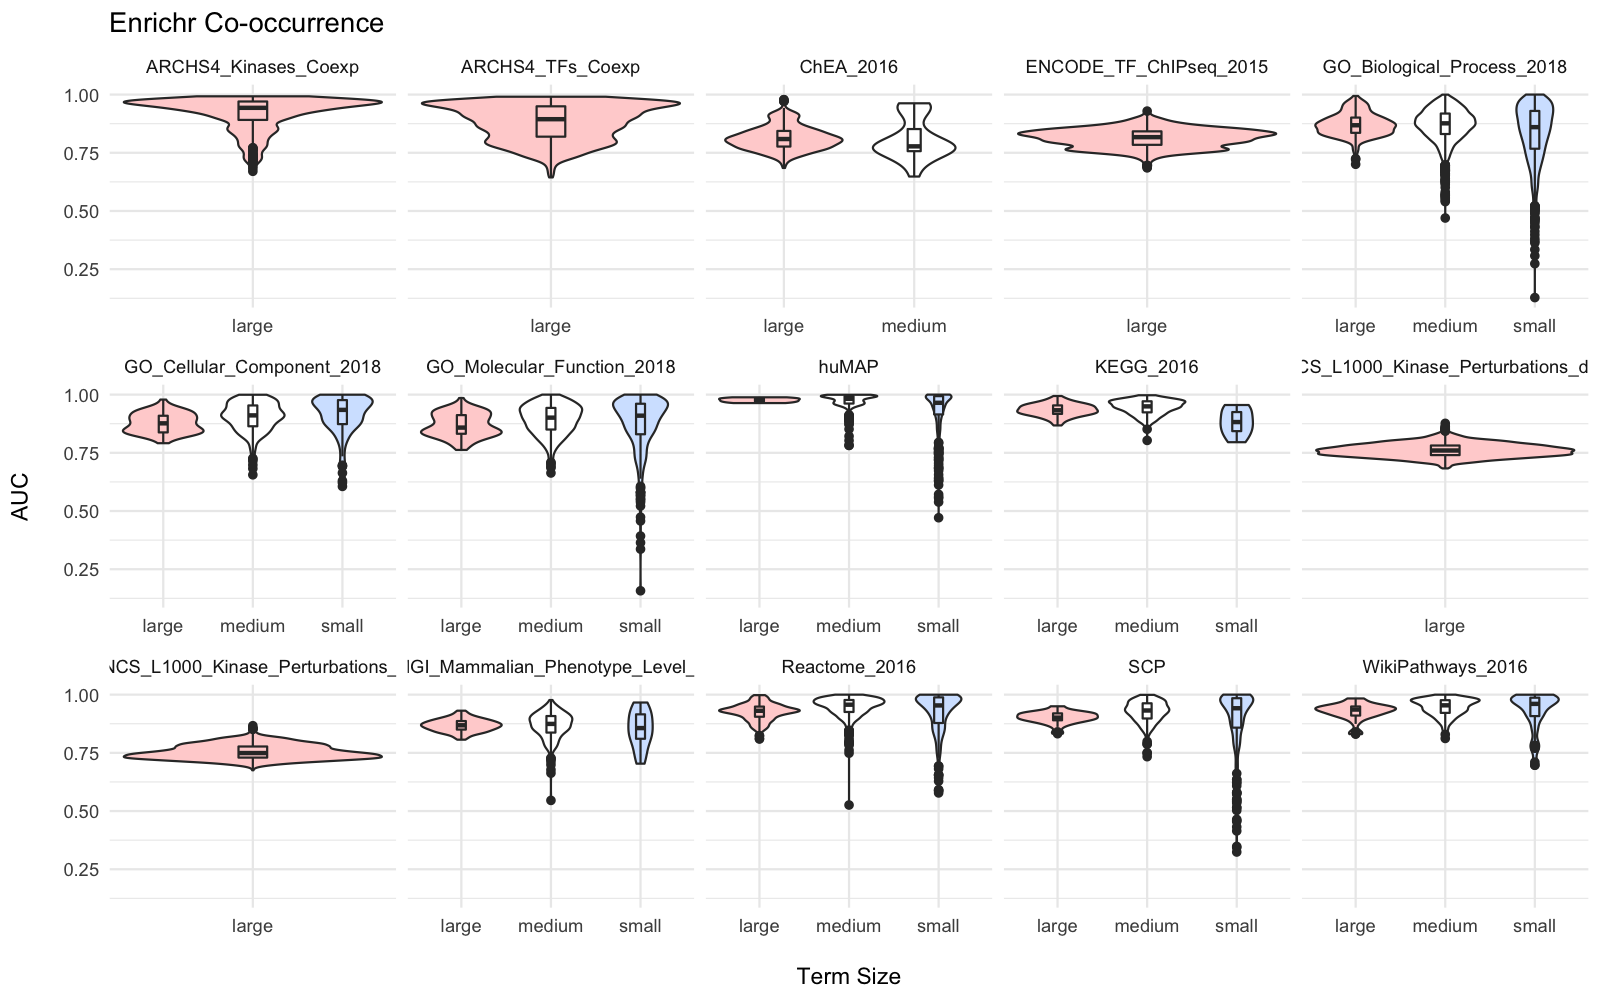

In [12]:
for normalization in plot_dataframe.normalization.unique():
    plot_dataframe_subset = plot_dataframe[plot_dataframe['normalization'] == normalization]
    normalization = normalization.replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF').replace('zscore', 'Enrichr Co-occurrence').replace('random', 'Random')
    %R -i plot_dataframe_subset,normalization -h 1000 -w 1600 -r 150 gp <- ggplot(plot_dataframe_subset, aes(x=term_size, y=auc, fill=term_size)) + geom_violin() + geom_boxplot(width=0.1) + facet_wrap(~library, ncol=5, scales='free_x') + scale_fill_manual(values=c('#ffd3d3', 'white', '#d3e4ff')) + xlab('\nTerm Size') + ylab('AUC\n') + ggtitle(normalization) + guides(fill=FALSE) + theme_minimal(); print(gp);

### 4. Scatter plots

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



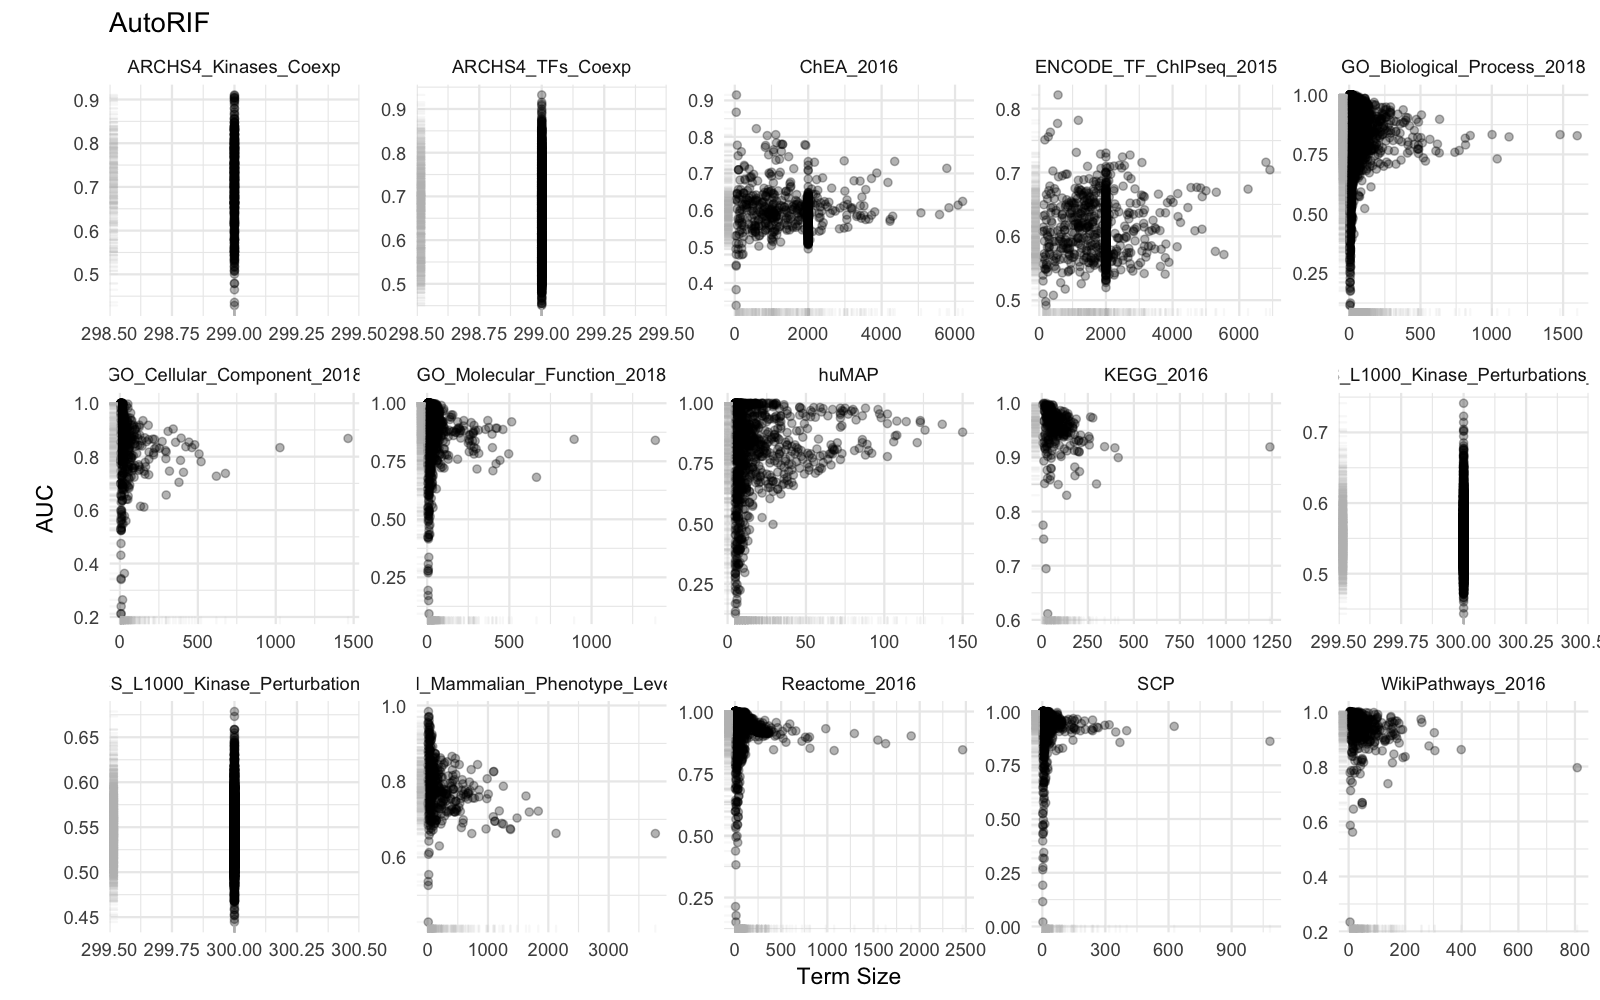

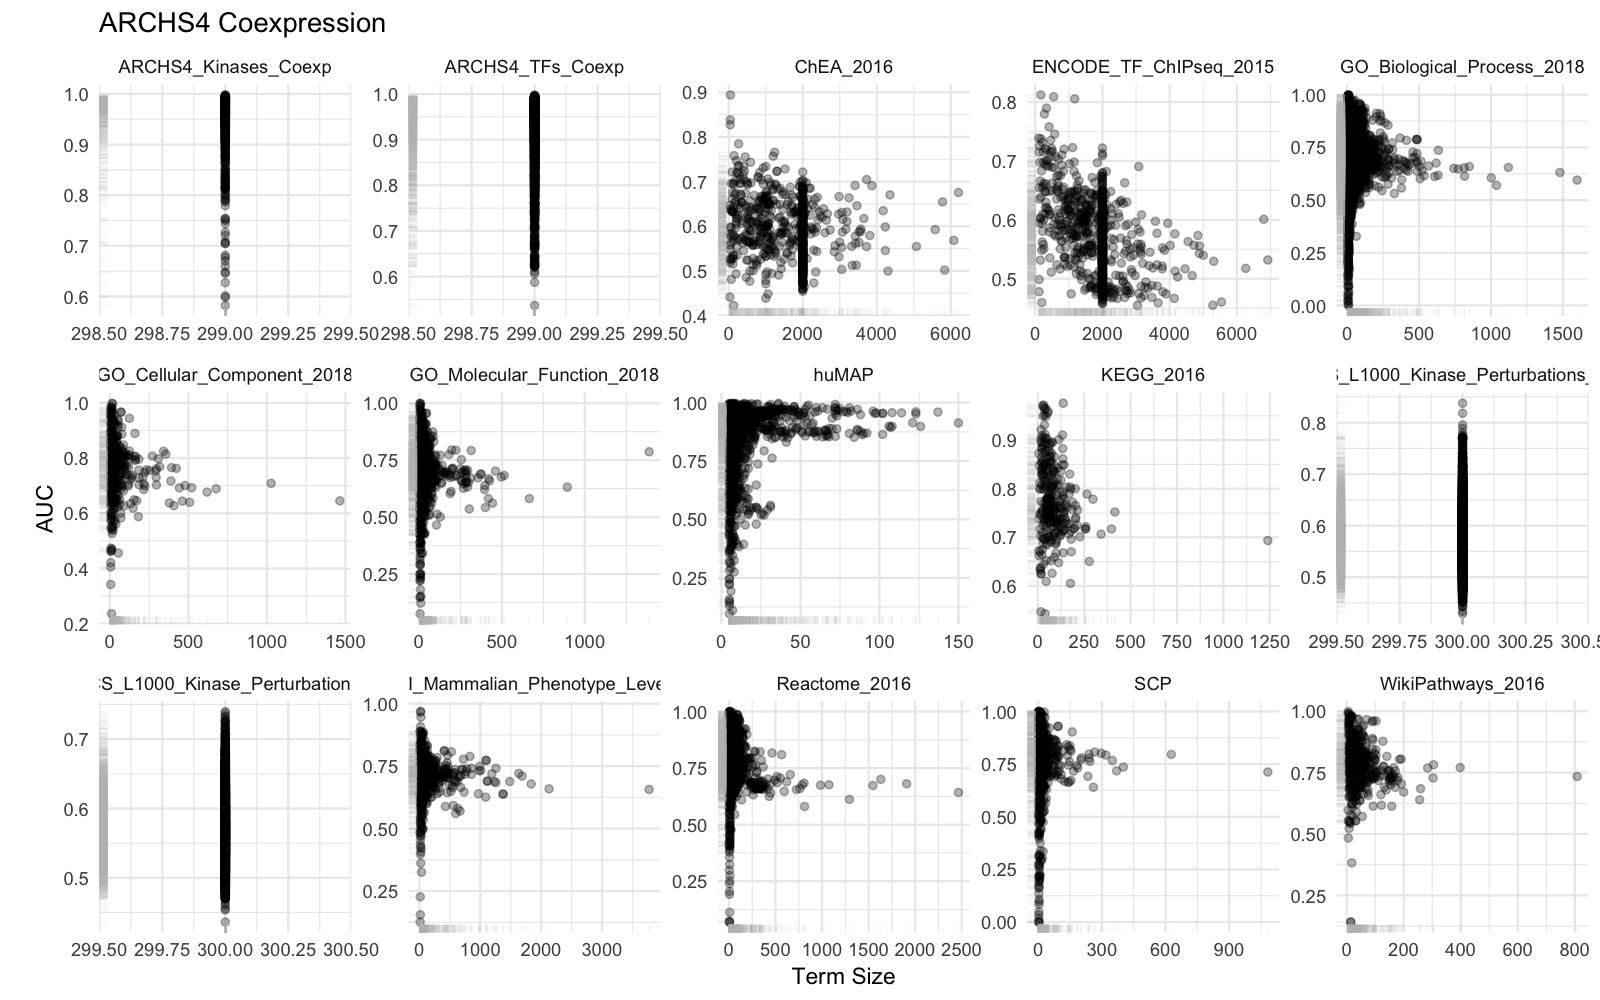

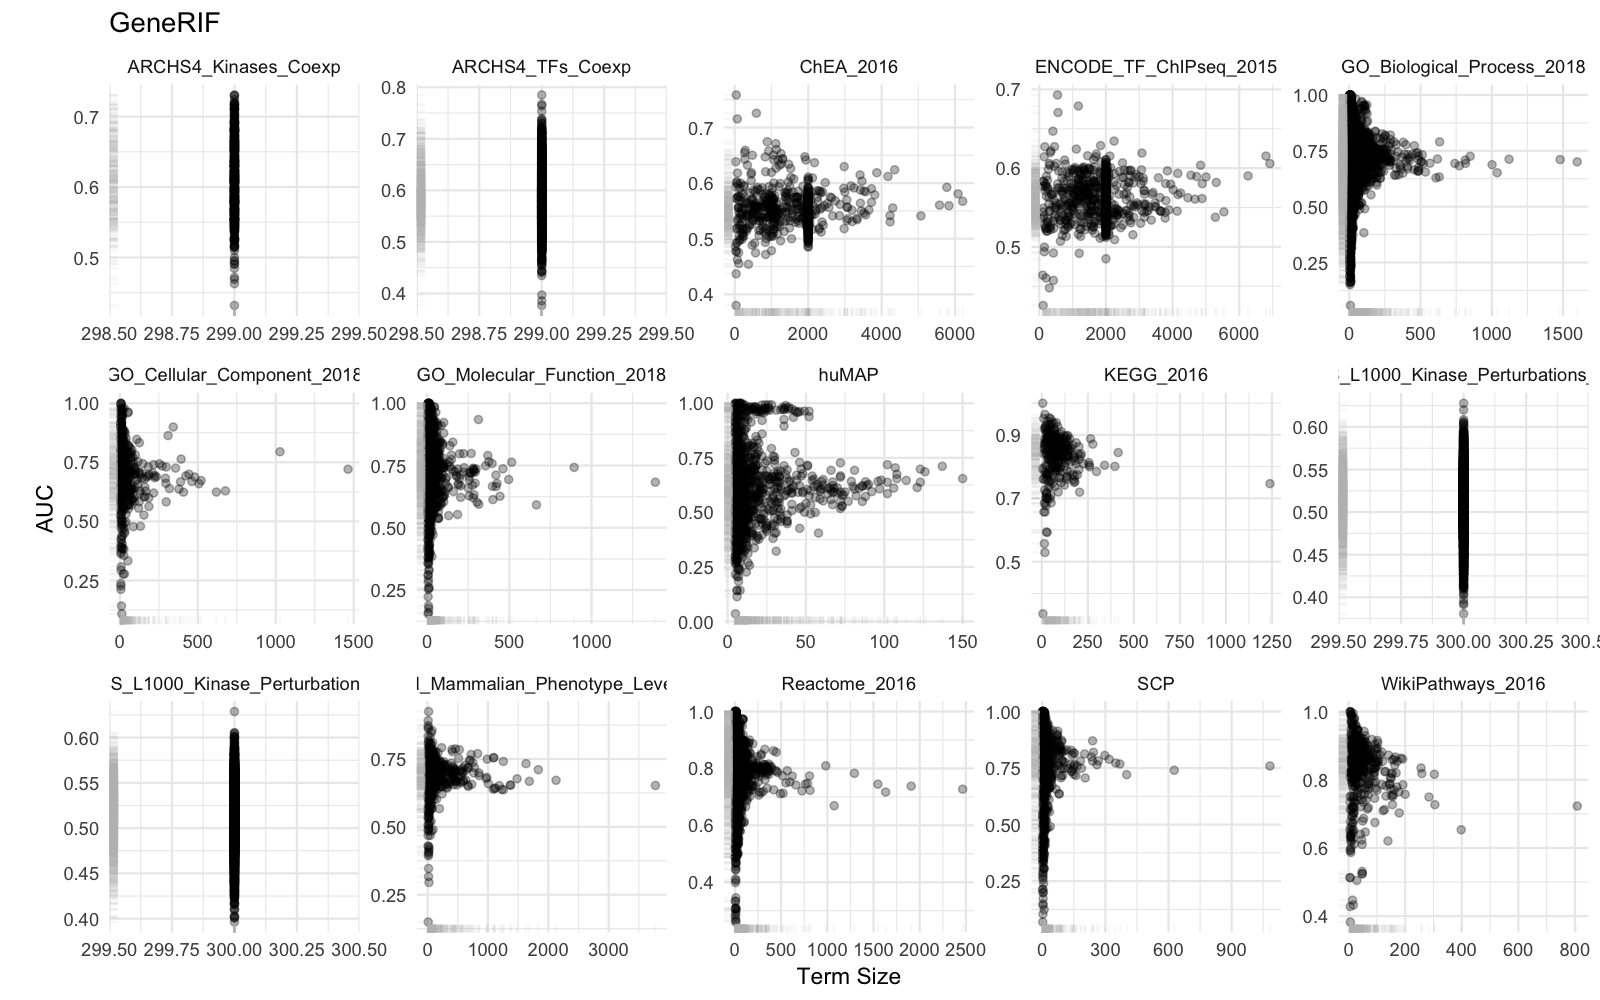

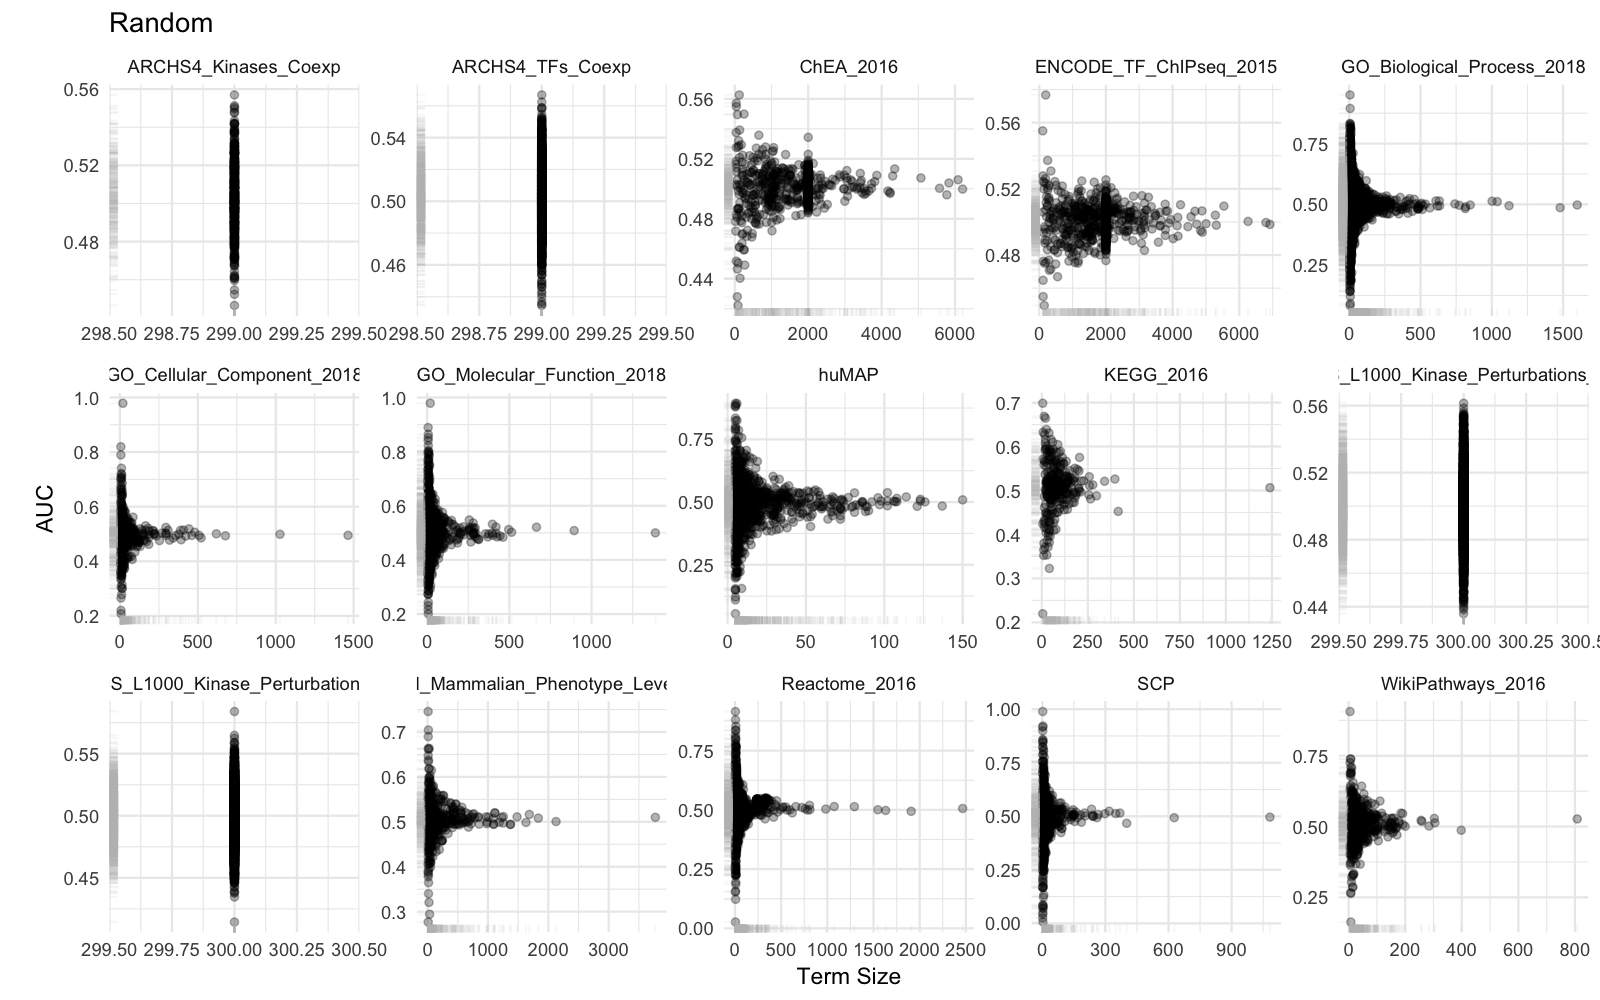

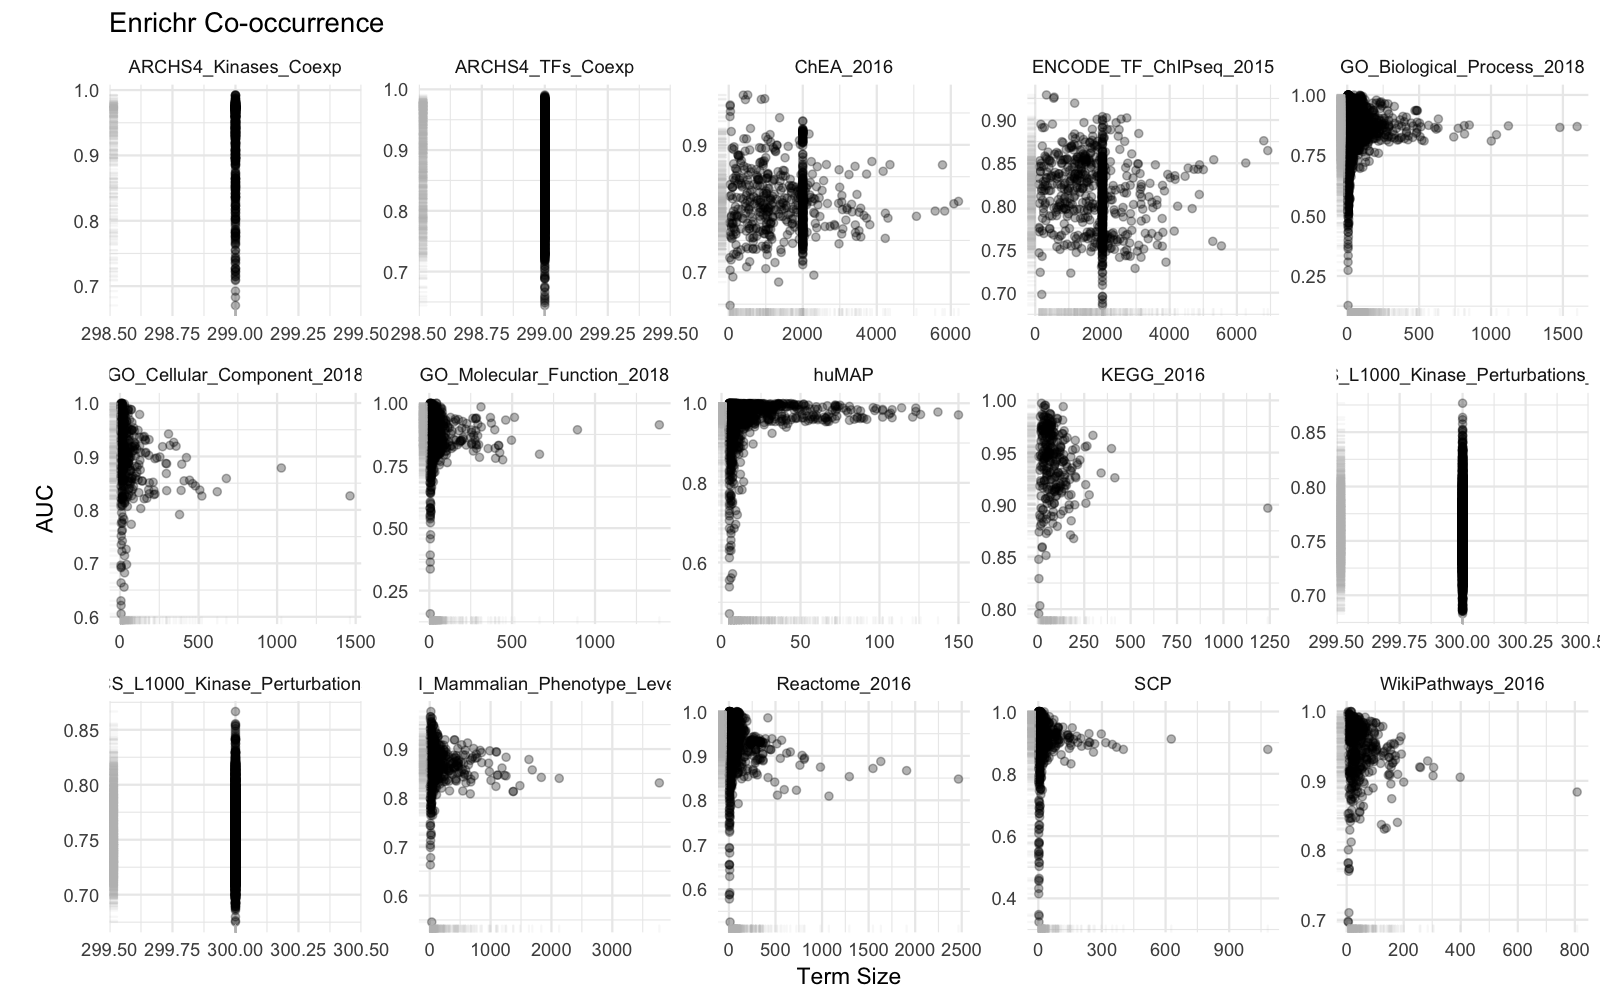

In [13]:
for normalization in plot_dataframe.normalization.unique():
    plot_dataframe_subset = plot_dataframe[plot_dataframe['normalization'] == normalization]
    normalization = normalization.replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF').replace('zscore', 'Enrichr Co-occurrence').replace('random', 'Random')
    %R -i plot_dataframe_subset,normalization -h 1000 -w 1600 -r 150 gp <- ggplot(plot_dataframe_subset, aes(x=nr_genes, y=auc)) + geom_point(alpha=0.3) + geom_rug(alpha=0.1, color='grey') + facet_wrap(~library, ncol=5, scales='free') + ggtitle(normalization) + ylab('\nAUC') + xlab('Term Size') + theme_minimal(); print(gp);

### 5. Boxplots

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



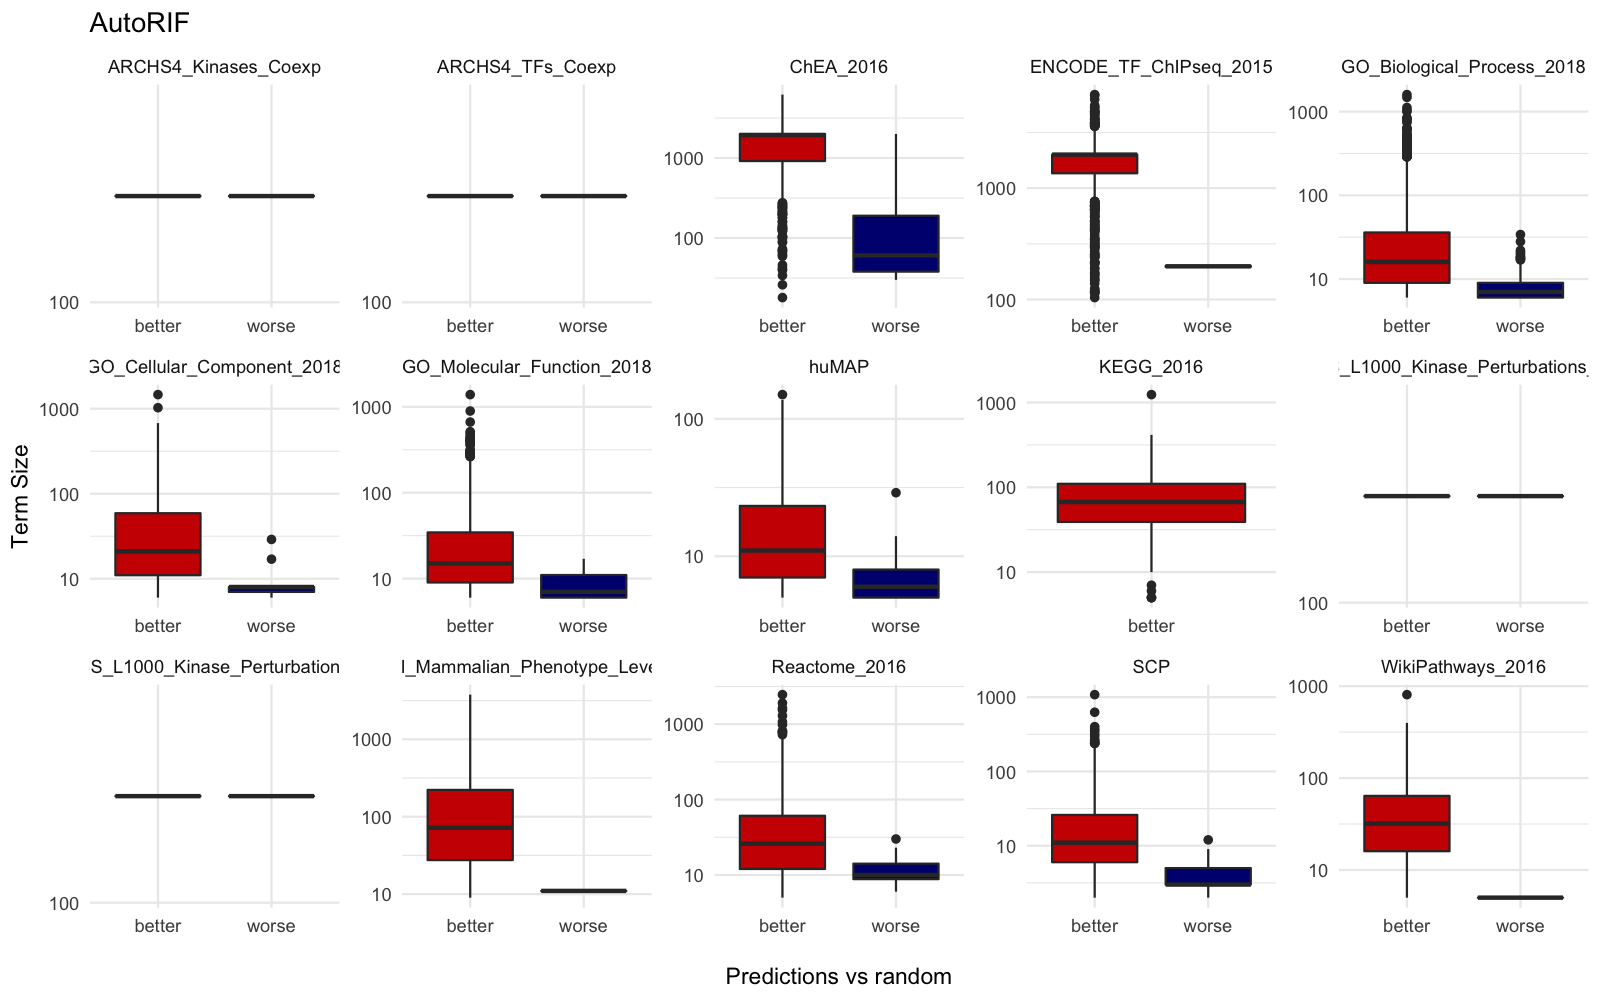

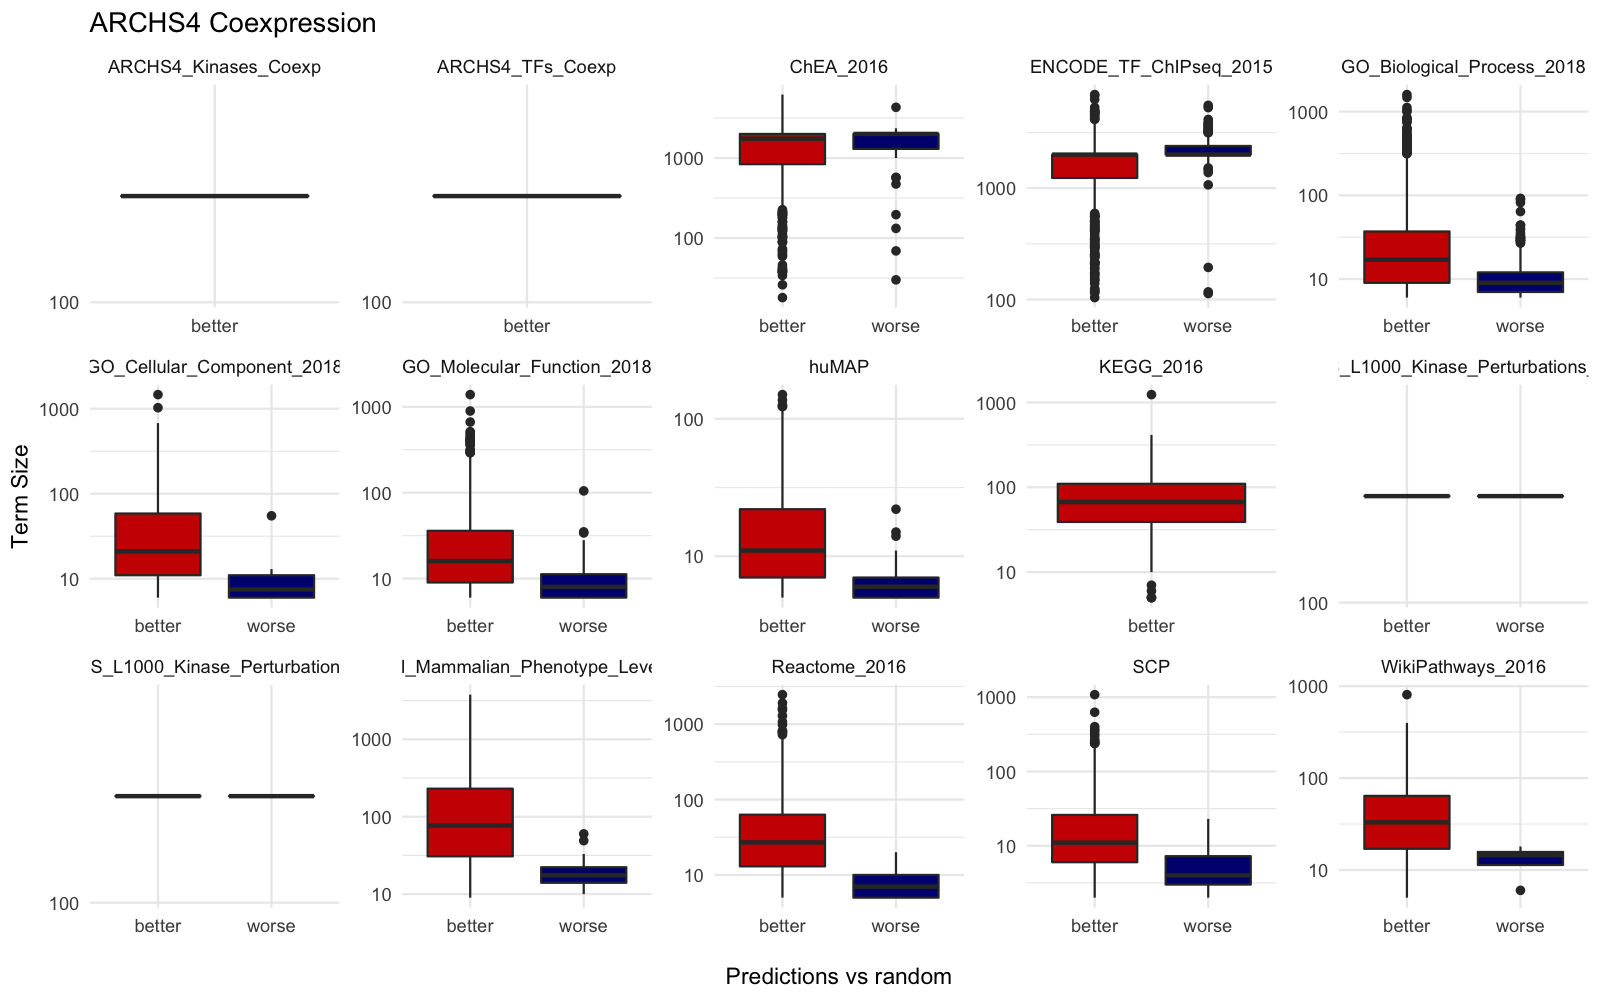

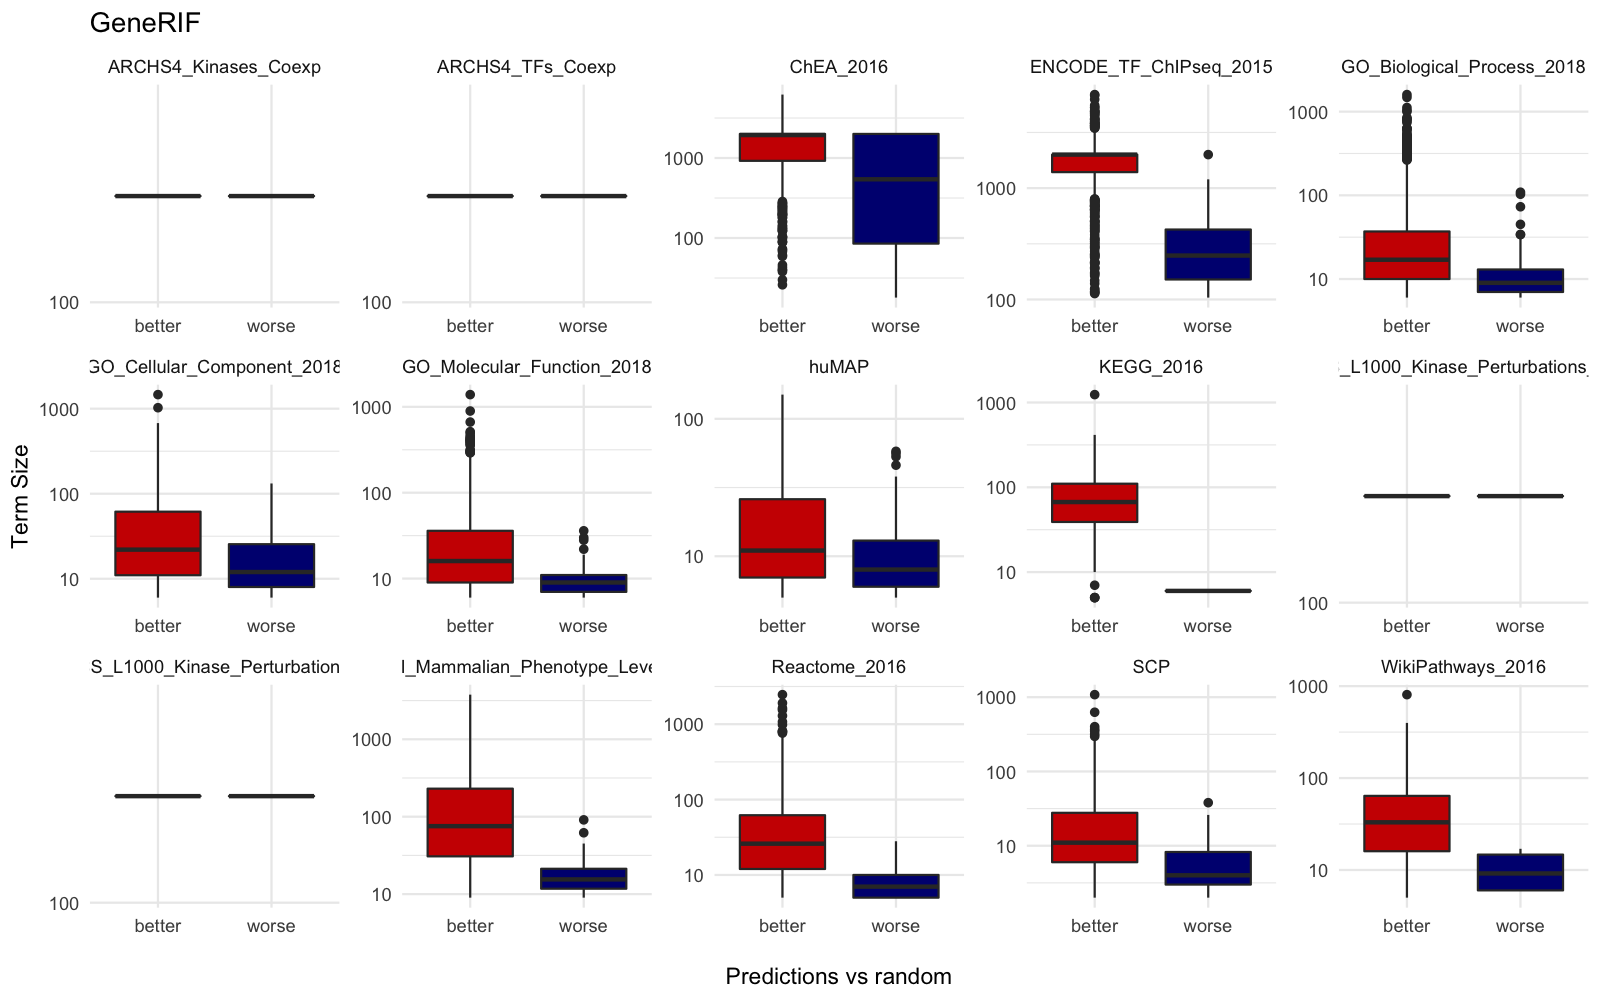

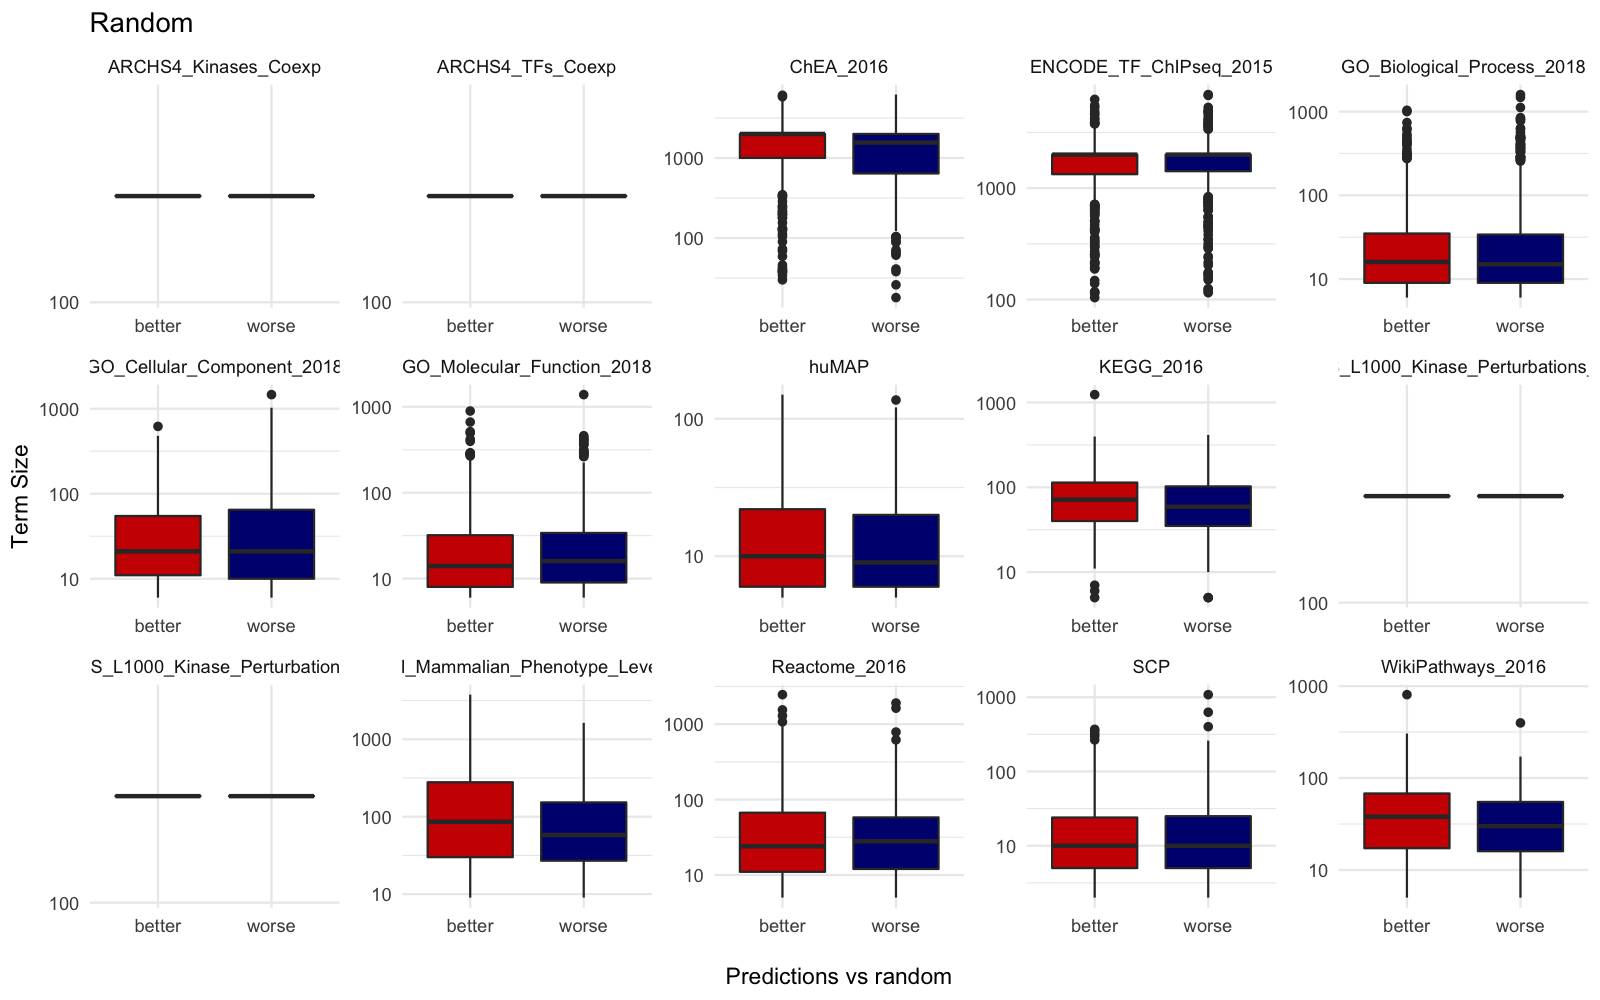

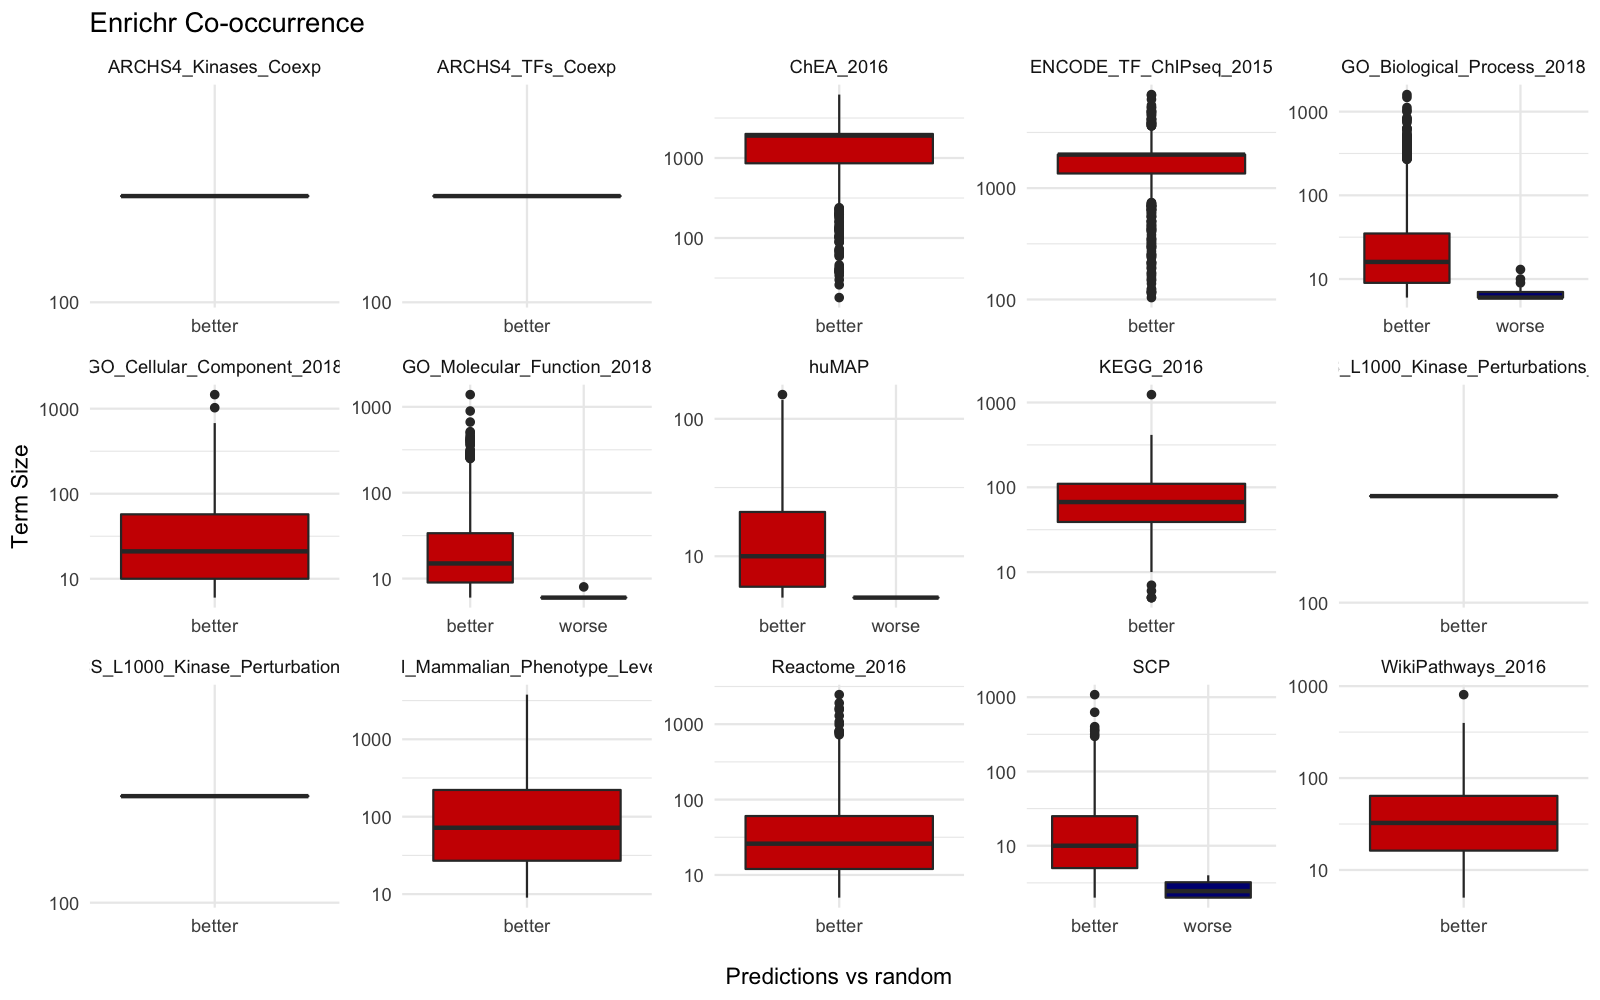

In [17]:
for normalization in plot_dataframe.normalization.unique():
    plot_dataframe_subset = plot_dataframe[plot_dataframe['normalization'] == normalization]
    normalization = normalization.replace('correlation', 'ARCHS4 Coexpression').replace('generif_overlap_zscore', 'GeneRIF').replace('autorif_overlap_zscore', 'AutoRIF').replace('zscore', 'Enrichr Co-occurrence').replace('random', 'Random')
    %R -i plot_dataframe_subset,normalization -h 1000 -w 1600 -r 150 gp <- ggplot(plot_dataframe_subset, aes(x=random, y=nr_genes, fill=random)) + geom_boxplot() +scale_fill_manual(values=c('red3','navyblue')) + facet_wrap(~library, ncol=5, scales='free') + ggtitle(normalization) + xlab('\nPredictions vs random') + ylab('Term Size') + scale_y_log10() + guides(fill=FALSE) + theme_minimal(); print(gp);